In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  2017nat_housing_survey1.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [2]:
# File to Load 
file_to_load = "../dataset/data_cleanOutliers.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,NHQSCHOOL,NHQSCRIME,RATINGNH,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1.0,2.0,10.0,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1.0,2.0,8.0,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1.0,2.0,10.0,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,2.0,2.0,7.0,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1.0,2.0,8.0,1
5,11000015,37980,153023.0,6,1950,4.0,3,2,3,1.0,2.0,7.0,1
6,11000016,37980,248031.0,6,1980,4.0,3,2,2,1.0,2.0,9.0,1
7,11000017,37980,287408.0,7,1950,6.0,3,4,2,1.0,2.0,10.0,1
8,11000023,37980,208364.0,7,1950,4.0,3,2,2,1.0,2.0,8.0,1
9,11000031,99998,39589.0,5,1940,3.0,2,3,2,2.0,2.0,6.0,1


# Cleaning and Preprocessing Data for Machine Learning

In [3]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL      0
OMB13CBSA    0
MARKETVAL    0
TOTROOMS     0
YRBUILT      0
UNITSIZE     0
BEDROOMS     0
BATHROOMS    0
BLD          0
outliers     0
dtype: int64

In [3]:
housing_df = housing_data.copy()

# We will study single family houses only
housing_df = housing_df.loc[housing_df['BLD'] == 2]
housing_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,NHQSCHOOL,NHQSCRIME,RATINGNH,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1.0,2.0,10.0,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1.0,2.0,8.0,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1.0,2.0,10.0,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,2.0,2.0,7.0,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1.0,2.0,8.0,1


In [4]:
# Let's see which city has the most rows and use that as our data
city_count_df = housing_df.groupby(['OMB13CBSA']).agg({'OMB13CBSA':'count'})
city_count_df.sort_values('OMB13CBSA')

# Use 19100 - DFW Texas

,OMB13CBSA
OMB13CBSA,
41860,210
35620,429
31080,449
33100,586
14460,595
47900,653
37980,687
42660,706
16980,797


In [4]:
# Further narrow down to one city DFW Texas 
housing_train_df = housing_df.loc[housing_df['OMB13CBSA'] == 19100]
housing_train_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,NHQSCHOOL,NHQSCRIME,RATINGNH,outliers
3623,11014590,19100,190639.0,5,1940,4.0,2,1,2,1.0,2.0,7.0,1
3624,11014595,19100,374382.0,5,1970,4.0,3,3,2,1.0,2.0,8.0,1
3625,11014596,19100,178064.0,6,1980,5.0,3,3,2,1.0,2.0,10.0,1
3626,11014606,19100,378147.0,9,1970,9.0,4,5,2,1.0,2.0,9.0,1
3627,11014607,19100,58516.0,6,1950,5.0,3,3,2,1.0,2.0,5.0,1


In [5]:
# Find out how many records are in the train data
len(housing_train_df.index)

1146

In [6]:
# Build X and y
X = housing_train_df[["TOTROOMS", "UNITSIZE"]].values
y = housing_train_df["MARKETVAL"].values
print(X.shape, y.shape)

(1146, 2) (1146,)


## Build model

In [8]:
from sklearn.model_selection import train_test_split

X = housing_train_df[["TOTROOMS", "BATHROOMS", "UNITSIZE"]]
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(859, 3) (859, 1)


In [9]:
# Results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)

print('R2: ', score)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 



R2:  0.47172332229123204
Weight coefficients:  [[ 8341.4928021  31348.37541292 29585.73257339]]
y-axis intercept:  [-108109.11406612]


## Predict

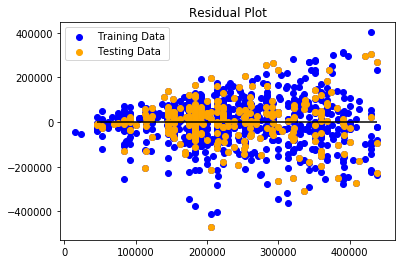

In [10]:
# Build Residual Plot
prediction = model.predict(X_test)
plt.scatter(model.predict(X), model.predict(X) - y, c="blue", label="Training Data")
plt.scatter(prediction, prediction - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.title("Residual Plot")
plt.savefig("../output/MultiLinear_City_Residual_Clean.png", bbox_inches='tight')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
MSE = mean_squared_error(y_test, prediction)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 9285813108.596216, R2: 0.44268361495124264
